# Integrating Supply Chain Data
### Daniel Shamsul

In [ ]:
# Load pandas and dataset
import pandas as pd

orders_data = pd.read_csv('orders.csv')
product_data = pd.read_csv('product-supplier.csv')

In [ ]:
# Basic information about the dataset
print(orders_data.info())
print(orders_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.7+ MB
None
         Customer ID      Order ID    Product ID  Quantity Ordered  \
count  185013.000000  1.850130e+05  1

In [ ]:
# Basic information about the dataset
print(product_data.info())
print(product_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product ID        5504 non-null   int64 
 1   Product Line      5504 non-null   object
 2   Product Category  5504 non-null   object
 3   Product Group     5504 non-null   object
 4   Product Name      5504 non-null   object
 5   Supplier Country  5504 non-null   object
 6   Supplier Name     5504 non-null   object
 7   Supplier ID       5504 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 344.1+ KB
None
         Product ID   Supplier ID
count  5.504000e+03   5504.000000
mean   2.280112e+11   5933.765625
std    1.150498e+10   5582.506919
min    2.101001e+11     50.000000
25%    2.201001e+11   1303.000000
50%    2.202003e+11   3298.000000
75%    2.402001e+11  10225.000000
max    2.408002e+11  18139.000000


In [ ]:
# Get number of rows and columns in each dataset
print('Size of product_data: {}'.format(product_data.shape))
print('Size of orders_data: {}'.format(orders_data.shape))

Size of product_data: (5504, 8)
Size of orders_data: (185013, 9)


## Data Cleaning
1. Check for duplicate data
  - If any duplicate data exists, remove duplicates.
2. Replace spaces for underscores in column names
  - Since SQL does not take spaces, in order to run SQL queries on both databases, spaces in column names has to be replaced with underscores.

In [ ]:
# Check for duplicate data
print ('Number of duplicates in product_data: {}'.format(
	sum(product_data.duplicated(subset=['Product ID', 'Product Name'], keep=False))))

print ('Number of duplicates in orders_data: {}'.format(
	sum(orders_data.duplicated(subset=['Order ID', 'Customer ID'], keep=False))))

Number of duplicates in product_data: 0
Number of duplicates in orders_data: 0


In [ ]:
# Replace spaces with underscores in column names
product_data.columns = product_data.columns.str.replace(' ', '_')

# Display the updated column names
print(product_data.columns)

Index(['Product_ID', 'Product_Line', 'Product_Category', 'Product_Group',
       'Product_Name', 'Supplier_Country', 'Supplier_Name', 'Supplier_ID'],
      dtype='object')


In [ ]:
# Replace spaces with underscores in column names
orders_data.columns = orders_data.columns.str.replace(' ', '_')

# Display the updated column names
print(orders_data.columns)

Index(['Customer_ID', 'Customer_Status', 'Date_Order_was_placed',
       'Delivery_Date', 'Order_ID', 'Product_ID', 'Quantity_Ordered',
       'Total_Retail_Price_for_This_Order', 'Cost_Price_Per_Unit'],
      dtype='object')


In [ ]:
import sqlite3

# Create a connection to a new SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Convert product_data to a SQL table
product_data.to_sql('product_data', conn, if_exists='replace', index=False)

# Convert genres_data to a SQL table
orders_data.to_sql('orders_data', conn, if_exists='replace', index=False)

conn.commit()

In [ ]:
# View attributes of each table
print(product_data.columns)
print(orders_data.columns)

Index(['Product_ID', 'Product_Line', 'Product_Category', 'Product_Group',
       'Product_Name', 'Supplier_Country', 'Supplier_Name', 'Supplier_ID'],
      dtype='object')
Index(['Customer_ID', 'Customer_Status', 'Date_Order_was_placed',
       'Delivery_Date', 'Order_ID', 'Product_ID', 'Quantity_Ordered',
       'Total_Retail_Price_for_This_Order', 'Cost_Price_Per_Unit'],
      dtype='object')


In [ ]:
# View first 5 rows of product table
product_data.head()

,Product_ID,Product_Line,Product_Category,Product_Group,Product_Name,Supplier_Country,Supplier_Name,Supplier_ID
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50


In [ ]:
# View first 5 rows of orders table
orders_data.head()

,Customer_ID,Customer_Status,Date_Order_was_placed,Delivery_Date,Order_ID,Product_ID,Quantity_Ordered,Total_Retail_Price_for_This_Order,Cost_Price_Per_Unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


In [ ]:
# SQL command to merge both datasets using Product_ID
join_query = '''
SELECT
    o.Customer_ID, o.Customer_Status, o.Date_Order_was_placed, o.Delivery_Date,
    o.Product_ID, o.Quantity_Ordered, o.Total_Retail_Price_for_This_Order,
    o.Cost_Price_Per_Unit, p.Product_Line, p.Product_Category,
    p.Product_Group, p.Product_Name, p.Supplier_Country, p.Supplier_Name
FROM
    orders_data o
INNER JOIN
    product_data p
ON
    o.Product_ID = p.Product_ID;
'''

# Execute the command and fetch all results
cursor.execute(join_query)
join_results = cursor.fetchall()

# Display the results
df = pd.DataFrame(join_results, columns=['Customer_ID', 'Customer_Status', 'Date_Order_was_placed', 'Delivery_Date', 'Product_ID', 'Quantity_Ordered', 'Total_Retail_Price_for_This_Order',
                                        'Cost_Price_Per_Unit', 'Product_Line', 'Product_Category', 'Product_Group', 'Product_Name', 'Supplier_Country', 'Supplier_Name'])  # Using Pandas for better visualization
print('Size of join_results: {}'.format(df.shape))

df.head()

Size of join_results: (185013, 14)


,Customer_ID,Customer_Status,Date_Order_was_placed,Delivery_Date,Product_ID,Quantity_Ordered,Total_Retail_Price_for_This_Order,Cost_Price_Per_Unit,Product_Line,Product_Category,Product_Group,Product_Name,Supplier_Country,Supplier_Name
0,579,Silver,01-Jan-17,07-Jan-17,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports
1,7574,SILVER,01-Jan-17,05-Jan-17,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports
2,28861,Gold,01-Jan-17,04-Jan-17,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd
3,43796,Gold,01-Jan-17,06-Jan-17,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc
4,54673,Gold,01-Jan-17,04-Jan-17,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc


In [ ]:
conn.close()

## Feature engineering
1. Calculate Profit for each order
2. Calculate Delivery Time for each order in days

In [ ]:
# Calculate Profit for each order
df['Profit'] = df['Total_Retail_Price_for_This_Order'] - (df['Cost_Price_Per_Unit'] * df['Quantity_Ordered'])


In [ ]:
# Calculate Delivery Time in days:
# Parse dates with the specified format
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%d-%b-%y')
df['Date_Order_was_placed'] = pd.to_datetime(df['Date_Order_was_placed'], format='%d-%b-%y')

# Calculate delivery time in days
df['Delivery_Time'] = (df['Delivery_Date'] - df['Date_Order_was_placed']).dt.days



## Exploratory Data Analaysis
1. Identify top 10 selling products
2. Find top 10 most profitable suppliers
3. Visualize monthly sales trends

In [ ]:
# Identify top-selling products:
top_selling_products = df.groupby('Product_Name').agg(
    total_quantity=('Quantity_Ordered', 'sum')
).sort_values(by='total_quantity', ascending=False).head(10)
print(top_selling_products)

                                       total_quantity
Product_Name                                         
Petanque Balls Chromium 8-pack                   1700
Comfort Shelter                                  1252
Lucky Tech Intergal Wp/B Rain Pants              1211
Hurricane 4                                      1208
Bulls Eye Stuart/Tungsten 24 Gram                1173
Big Guy Men's Air Tuned Sirocco Shoes            1117
Family Holiday 4                                 1078
Expedition10,Medium,Right,Blue Ribbon            1043
Rain Jacket                                      1030
Knife                                             911


In [ ]:
# Find the most profitable suppliers:
top_suppliers = df.groupby('Supplier_Name').agg(
    total_profit=('Profit', 'sum')
).sort_values(by='total_profit', ascending=False).head(10)
print(top_suppliers)


                             total_profit
Supplier_Name                            
Eclipse Inc                   1827973.620
3Top Sports                    922012.790
Magnifico Sports               800598.450
Twain Inc                      792474.955
Petterson AB                   745464.350
AllSeasons Outdoor Clothing    732028.850
Luna sastreria S.A.            652774.290
Top Sports                     582079.400
Mayday Inc                     568337.250
Van Dammeren International     466769.870


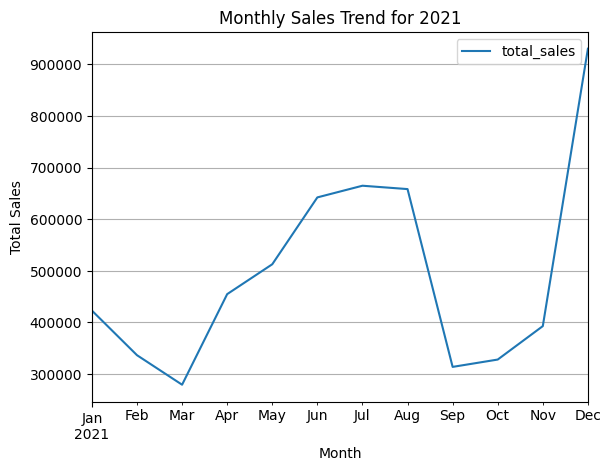

In [ ]:
# Plot sales trends
import matplotlib.pyplot as plt
monthly_sales = df.groupby(pd.to_datetime(df['Date_Order_was_placed']).dt.to_period('M')).agg(
    total_sales=('Total_Retail_Price_for_This_Order', 'sum')
)

monthly_sales = monthly_sales.to_timestamp()
monthly_sales_2021 = monthly_sales[monthly_sales.index.year == 2021]
monthly_sales_2021.plot(kind='line', title='Monthly Sales Trend for 2021', ylabel='Total Sales', xlabel='Month')
plt.grid()
plt.show()


In [ ]:
# Save outputs for ML predictions
df.to_csv('final_integrated_data.csv', index=False)
top_selling_products.to_csv('top_selling_products.csv', index=False)
top_suppliers.to_csv('top_suppliers.csv', index=False)


## Sales Predictions using ML
  
Ensemble classifiers using Gradient Boosting Regressor

Mean Squared Error: 9.681810599149557


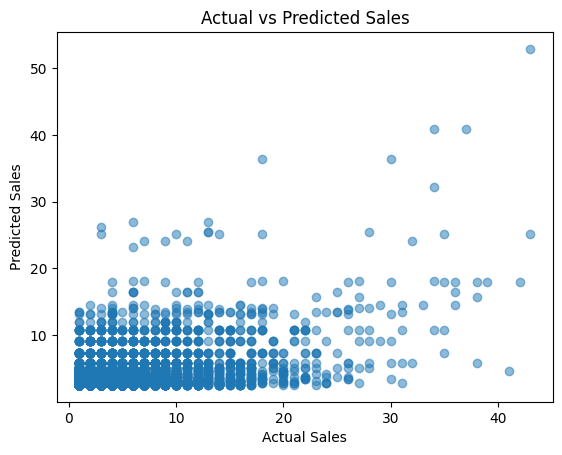

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
df = pd.read_csv('final_integrated_data.csv')
df['Date_Order_was_placed'] = pd.to_datetime(df['Date_Order_was_placed'])

# Aggregate sales by Product and Date (e.g., monthly)
df['Order_Month'] = df['Date_Order_was_placed'].dt.to_period('M')
sales_data = df.groupby(['Order_Month', 'Product_ID']).agg(
    total_sales=('Quantity_Ordered', 'sum')
).reset_index()

# Step 2: Feature Engineering
# Create lag features for previous months' sales
sales_data['Previous_Month_Sales'] = sales_data.groupby('Product_ID')['total_sales'].shift(1)

# Drop NaN values resulting from lag
sales_data = sales_data.dropna()

# Step 3: Train-Test Split
X = sales_data[['Previous_Month_Sales']]
y = sales_data['total_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 7: Visualize Results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
